
# Machine Learning  Project


## Project Description:
Problem Statement: Predicting Laptop Price based on Components

Dataset: Assuming you have downloaded the dataset from the provided in the folder, you should have a CSV file containing information about various laptops with their components and corresponding prices.

Perform regression analysis to predict the price of a laptop based on its components by
taking all the input parameters.

Also plot visuals by using Matplotlib/Seaborn data visualization comparing the different
features of the input parameters and do Exploratory data analysis (EDA) by using pandas. 

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sd
import pickle
# ds for Dataset , sd for seaborn
ds= pd.read_csv("C:\\Users\\DELL\\Desktop\\\laptop_price.csv", encoding='latin-1')
ds
#ss = pd.DataFrame("laptop_price.csv")
#print(ss)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [2]:
print("The Shape of the data is :", ds.shape)  # getting shape
print(ds.duplicated().sum())   #checking for duplicate columns 0 = no duplicate , 1 = Duplicates Exists
print(ds.isnull().sum()) # checking for null values

The Shape of the data is : (1303, 13)
0
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


# Changing type of Ram And Weight from object to int

>>for Future engineering Purpose

In [3]:
ds['Ram'] = ds['Ram'].str.replace('GB','') 
ds['Weight'] = ds['Weight'].str.replace('kg','')
ds

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [4]:

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
ds['Ram'] = ds['Ram'].astype('int32')
ds['Weight'] = ds['Weight'].astype('float32')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


# Data distribution based on Price_euros,Company

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

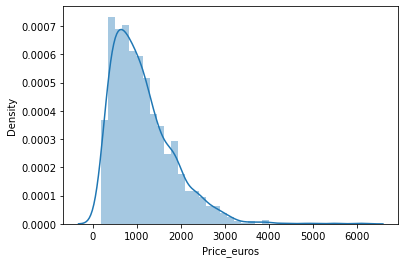

In [6]:
import seaborn as sd
sd.distplot(ds['Price_euros'])

<AxesSubplot:>

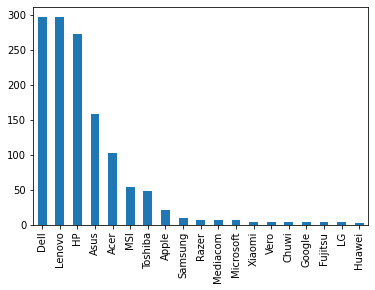

In [7]:
ds['Company'].value_counts().plot(kind='bar')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Netbook'),
  Text(0.0, 0, 'Notebook'),
  Text(1.0, 0, 'Gaming'),
  Text(2.0, 0, 'Ultrabook'),
  Text(3.0, 0, '2 in 1 Convertible'),
  Text(4.0, 0, 'Workstation'),
  Text(5.0, 0, 'Netbook'),
  Text(6.0, 0, '')])

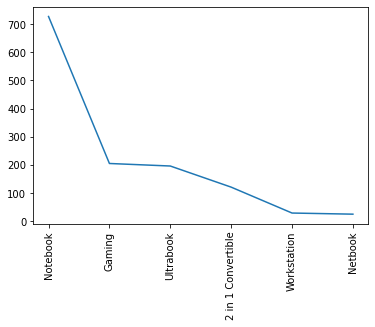

In [8]:
ds['TypeName'].value_counts().plot(kind='line')
plt.xticks(rotation='vertical')               #using matplotlib.pyplot
#pltshow()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(-20.0, 0, 'Intel Core i5 2.0GHz'),
  Text(0.0, 0, 'Intel Core i5 7200U 2.5GHz'),
  Text(20.0, 0, 'Intel Core i5 6300U 2.4GHz'),
  Text(40.0, 0, 'Intel Core i7 7660U 2.5GHz'),
  Text(60.0, 0, 'Intel Celeron Quad Core N3160 1.6GHz'),
  Text(80.0, 0, 'Intel Core i5 7200U 2.50GHz'),
  Text(100.0, 0, 'Intel Core M m3-7Y30 2.2GHz'),
  Text(120.0, 0, ''),
  Text(140.0, 0, '')])

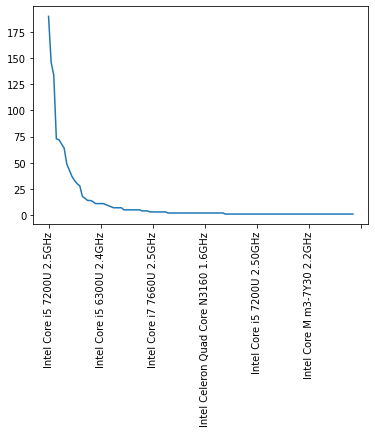

In [9]:
ds['Cpu'].value_counts().plot(kind='line')
#sd.barplot(x=ds["Product"],y=ds["Price_euros"])    
plt.xticks(rotation='vertical')               #using matplotlib.pyplot
#pltshow()

<AxesSubplot:>

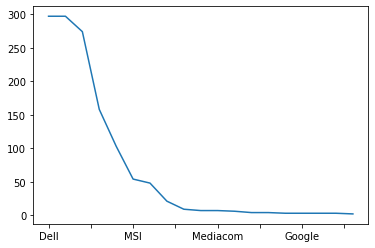

In [10]:
ds['Company'].value_counts().plot(kind='line')

# Predicting average Price of the brand using Graphs

NameError: name 'pltshow' is not defined

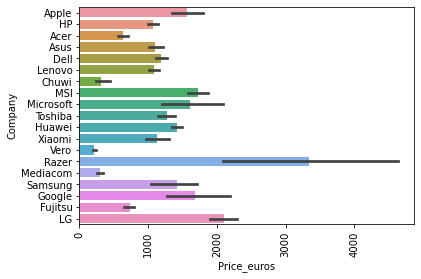

In [11]:
sd.barplot(x=ds["Price_euros"],y=ds["Company"])
plt.xticks(rotation='vertical')               #using matplotlib.pyplot
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

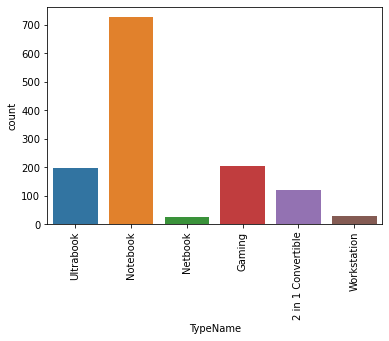

In [12]:
sd.countplot(x=ds["TypeName"])
plt.xticks(rotation='vertical')               #using matplotlib.pyplot

NameError: name 'pltshow' is not defined

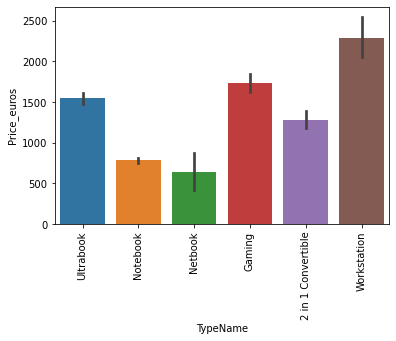

In [13]:
sd.barplot(y=ds["Price_euros"],x=ds["TypeName"])
plt.xticks(rotation='vertical')              
plt.show()

In [14]:
ds["TouchScreen"]=ds['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
ds
#print(ds.sample())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0


<AxesSubplot:>

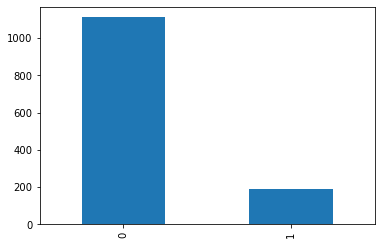

In [15]:
ds["TouchScreen"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price_euros'>

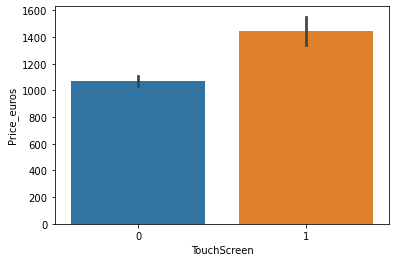

In [16]:
sd.barplot(y=ds['Price_euros'],x=ds["TouchScreen"])

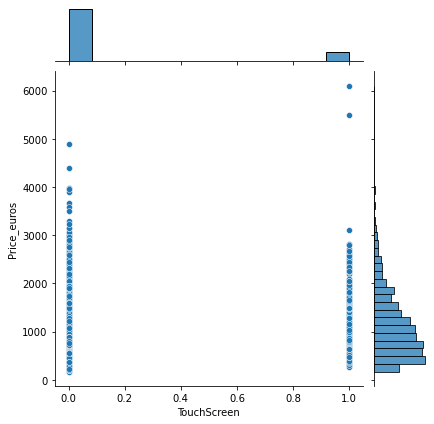

In [17]:
sd.jointplot(y=ds['Price_euros'],x=ds["TouchScreen"])

In [18]:
ds["Ips"]=ds['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
ds.head()
#print(ds.head())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Ips, Length: 1303, dtype: int64

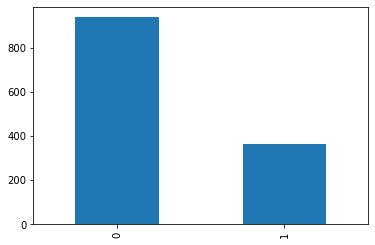

In [19]:
ds["Ips"].value_counts().plot(kind='bar')
ds['Ips']

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

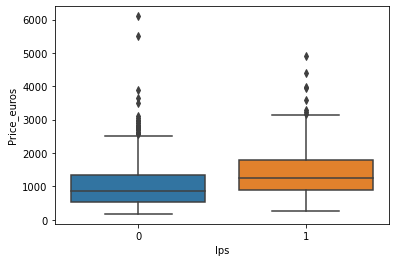

In [20]:
sd.boxplot(x=ds["Ips"],y=ds['Price_euros'])

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

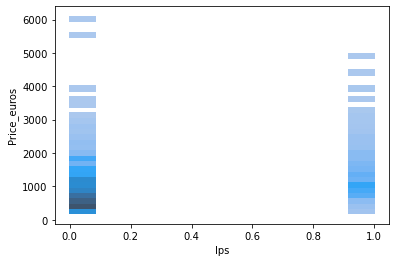

In [21]:
sd.histplot(x=ds["Ips"],y=ds['Price_euros'])

# Exacting the resolution form ScreenResolution

In [22]:
new = ds['ScreenResolution'].str.split("x",n=1,expand=True)

In [23]:
ds['X Resolution'] = new[0]
ds["Y Resolution"] = new[1]
ds
#print(ds.head())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,Y Resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,1366,768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,1366,768


In [24]:
ds['X Resolution'] = ds['X Resolution'].str.replace(",","").str.findall(r"(\d\.?\d+)").apply(lambda x:x[0])
ds.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,Y Resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
 13  TouchScreen       1303 non-null   int64  
 14  Ips               1303 non-null   int64  
 15  X Resolution      1303 non-null   object 
 16  Y Resolution      1303 non-null   object 


In [26]:
ds['X Resolution'] = ds['X Resolution'].astype('int')
ds['Y Resolution'] = ds['Y Resolution'].astype('int')
ds.head()
#ds.info()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,Y Resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [27]:
ds.corr()['Price_euros']      # finding co-relation bewteen Price_euros and other parameters

laptop_ID       0.067830
Inches          0.068197
Ram             0.743007
Weight          0.210370
Price_euros     1.000000
TouchScreen     0.191226
Ips             0.252208
X Resolution    0.556529
Y Resolution    0.552809
Name: Price_euros, dtype: float64

In [28]:
ds.corr()['Ram']

laptop_ID      -0.028607
Inches          0.237993
Ram             1.000000
Weight          0.383874
Price_euros     0.743007
TouchScreen     0.116984
Ips             0.206623
X Resolution    0.433121
Y Resolution    0.424437
Name: Ram, dtype: float64

## Creating a new Parameter  named PPI (Pixel Per Inches)

In [29]:
ds['PPI']=(((ds["X Resolution"]**2) + (ds["Y Resolution"]**2))**0.5/ds['Inches']).astype('float')

In [30]:
ds.corr()['Price_euros'] 

laptop_ID       0.067830
Inches          0.068197
Ram             0.743007
Weight          0.210370
Price_euros     1.000000
TouchScreen     0.191226
Ips             0.252208
X Resolution    0.556529
Y Resolution    0.552809
PPI             0.473487
Name: Price_euros, dtype: float64

In [31]:
ds.drop(columns=['ScreenResolution'],inplace=True)
ds.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,Y Resolution,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [32]:
ds.drop(columns=['Inches',"Y Resolution"],inplace=True)
ds.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005


In [33]:
ds['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [34]:
ds['CPU Name']=ds['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
ds.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Name
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5


In [35]:
def fetch_processor(text):
    if text=="Intel Core i7" or text == 'Intel Core i5' or text =='Intel Core i3' :
        return text
    else:
        if text.split()[0] == {"Intel"} :
            return 'Other Intel Processor'
        else :
            return 'AMD Processor'

In [36]:
ds['CPU Brand'] = ds['CPU Name'].apply(fetch_processor)

In [37]:
ds.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Name,CPU Brand
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,Intel Core i5
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:ylabel='CPU Brand'>

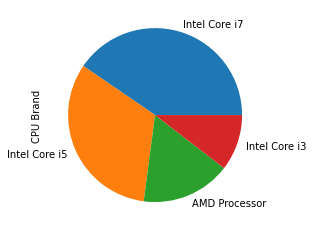

In [38]:
ds['CPU Brand'].value_counts().plot(kind='pie')

<AxesSubplot:>

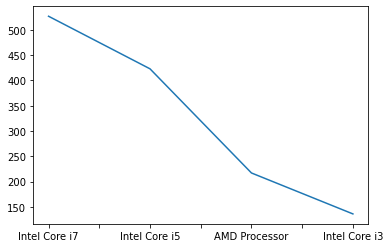

In [39]:
ds['CPU Brand'].value_counts().plot(kind='line')

<AxesSubplot:xlabel='CPU Brand', ylabel='Price_euros'>

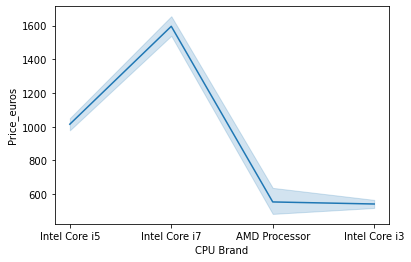

In [40]:
sd.lineplot(x=ds['CPU Brand'],y=ds["Price_euros"])
#plt.xticks(rotation='vertical')  is used  to  align the text like intel core and so on
#plt.show()      

In [41]:
ds.drop(columns=['CPU Name','Cpu'],inplace=True)
ds.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand
0,1,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5
2,3,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5


<AxesSubplot:>

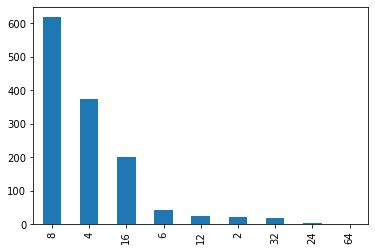

In [42]:
ds['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

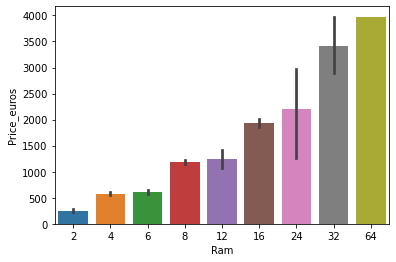

In [43]:
sd.barplot(x=ds['Ram'],y=ds["Price_euros"])
#plt.xticks(rotation='vertical') # is used  to  align the text like intel core and so on
#plt.show()      

In [44]:
ds['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [45]:
ds['Memory'] = ds['Memory'].astype(str).replace('\.0', '', regex=True)
ds["Memory"] = ds["Memory"].str.replace('GB', '')
ds["Memory"] = ds["Memory"].str.replace('TB', '000')
new = ds["Memory"].str.split("+", n = 1, expand = True)

ds["first"]= new[0]
ds["first"]=ds["first"].str.strip()

ds["second"]= new[1]

ds["Layer1HDD"] = ds["first"].apply(lambda x: 1 if "HDD" in x else 0)
ds["Layer1SSD"] = ds["first"].apply(lambda x: 1 if "SSD" in x else 0)
ds["Layer1Hybrid"] = ds["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
ds["Layer1Flash_Storage"] = ds["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

ds['first'] = ds['first'].str.replace(r'\D', '')

ds["second"].fillna("0", inplace = True)

ds["Layer2HDD"] = ds["second"].apply(lambda x: 1 if "HDD" in x else 0)
ds["Layer2SSD"] = ds["second"].apply(lambda x: 1 if "SSD" in x else 0)
ds["Layer2Hybrid"] = ds["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
ds["Layer2Flash_Storage"] = ds["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

ds['second'] = ds['second'].str.replace(r'\D', '')

ds["first"] = ds["first"].astype(int)
ds["second"] = ds["second"].astype(int)

ds["HDD"]=(ds["first"]*ds["Layer1HDD"]+ds["second"]*ds["Layer2HDD"])
ds["SSD"]=(ds["first"]*ds["Layer1SSD"]+ds["second"]*ds["Layer2SSD"])
ds["Hybrid"]=(ds["first"]*ds["Layer1Hybrid"]+ds["second"]*ds["Layer2Hybrid"])
ds["Flash_Storage"]=(ds["first"]*ds["Layer1Flash_Storage"]+ds["second"]*ds["Layer2Flash_Storage"])

ds.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-45-2c4eb34758e4>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['first'] = ds['first'].str.replace(r'\D', '')
<ipython-input-45-2c4eb34758e4>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['second'] = ds['second'].str.replace(r'\D', '')


In [46]:
ds.tail()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1,1,1920,157.350512,Intel Core i7,0,128,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1,1,3200,276.053530,Intel Core i7,0,512,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0,0,1366,111.935204,AMD Processor,0,0,0,64
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,0,1366,100.454670,Intel Core i7,1000,0,0,0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,4,500 HDD,Intel HD Graphics,Windows 10,2.20,369.0,0,0,1366,100.454670,AMD Processor,500,0,0,0


In [47]:
ds.drop(columns=['Memory'],inplace=True)
ds.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,0,128
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,0,0


In [48]:
ds.corr()['Price_euros']

laptop_ID        0.067830
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
TouchScreen      0.191226
Ips              0.252208
X Resolution     0.556529
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [49]:
ds.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,0,128
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,0,0


In [50]:
ds.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
ds.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256


In [51]:
ds['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [52]:
ds['GPU Brand']=ds['Gpu'].apply(lambda x:x.split()[0])
ds.head()

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,GPU Brand
0,1,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,Intel
1,2,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,Intel
2,3,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,Intel
3,4,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,AMD
4,5,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot:xlabel='GPU Brand', ylabel='Price_euros'>

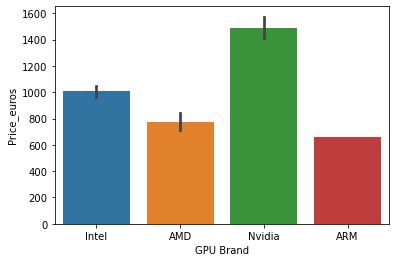

In [53]:
sd.barplot(x=ds['GPU Brand'],y=ds["Price_euros"])

In [54]:
ds.drop(columns=['Gpu'],inplace=True)
ds.head()

,laptop_ID,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,GPU Brand
0,1,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,Intel
1,2,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,Intel
2,3,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,Intel
3,4,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,AMD
4,5,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,Intel


In [55]:
ds.drop(columns=['laptop_ID'],inplace=True)
ds.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,Intel


In [56]:
ds['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [57]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [58]:
ds['OS'] = ds['OpSys'].apply(cat_os)
ds.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,Intel,Mac


In [59]:
ds.drop(columns=['OpSys','Product'],inplace=True)
ds.head()

,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,Ips,X Resolution,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,2560,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,1440,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,1920,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,2880,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,2560,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:xlabel='OS', ylabel='Price_euros'>

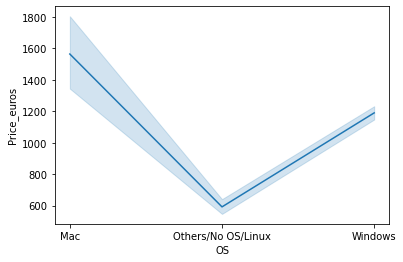

In [60]:
sd.lineplot(x=ds['OS'],y=ds["Price_euros"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

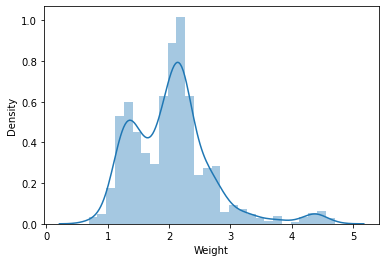

In [61]:
sd.distplot(ds["Weight"])

In [62]:
ds.drop(columns=['X Resolution'],inplace=True)
ds.head()

,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:>

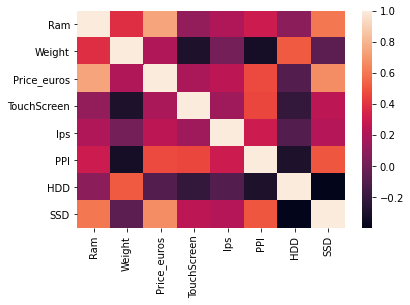

In [63]:
sd.heatmap(ds.corr())  

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

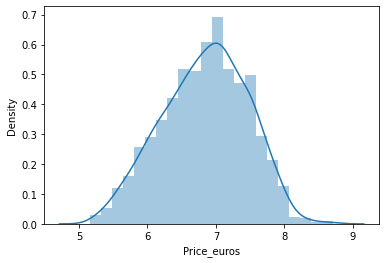

In [64]:
sd.distplot(np.log(ds['Price_euros']))

In [65]:
ds.head()

,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

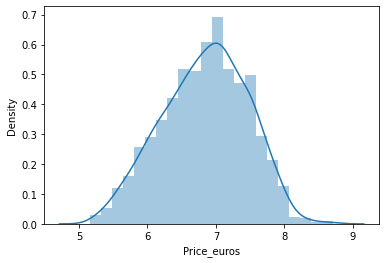

In [66]:
sd.distplot(np.log(ds['Price_euros']))

In [67]:
ds.head()

,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [68]:
ds['Price_INR'] = ds['Price_euros'].update(ds['Price_euros'] * 87)
ds['Price_INR'] = ds['Price_euros']
ds.head(2)

,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS,Price_INR
0,Apple,Ultrabook,8,1.37,116553.03,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,116553.03
1,Apple,Ultrabook,8,1.34,78207.78,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,78207.78


In [69]:
ds.drop(columns=['Price_euros'],inplace=True)
ds.head(2)

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS,Price_INR
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,116553.03
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,78207.78


In [70]:
#ds.drop(columns=["Product"],inplace=True)
#ds.head()

In [71]:
X = ds.drop(columns=["Price_INR"])
y = np.log(ds['Price_INR'])

In [72]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,AMD Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [73]:
y

0       11.666102
1       11.267124
2       10.820278
3       12.304823
4       11.963448
          ...    
1298    10.924246
1299    11.778462
1300     9.899630
1301    11.104476
1302    10.376705
Name: Price_INR, Length: 1303, dtype: float64

In [74]:
ds.describe()

,Ram,Weight,TouchScreen,Ips,PPI,HDD,SSD,Price_INR
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038733,0.147352,0.280123,146.635987,413.783576,183.732924,97760.768266
std,5.084665,0.665475,0.354593,0.449231,43.121345,515.818779,186.966903,60813.786700
min,2.000000,0.690000,0.000000,0.000000,90.583402,0.000000,0.000000,15138.000000
25%,4.000000,1.500000,0.000000,0.000000,127.335675,0.000000,0.000000,52113.000000
50%,8.000000,2.040000,0.000000,0.000000,141.211998,0.000000,256.000000,84999.000000
75%,8.000000,2.300000,0.000000,1.000000,157.350512,1000.000000,256.000000,129445.560000
max,64.000000,4.700000,1.000000,1.000000,352.465147,2000.000000,1024.000000,530613.000000


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [76]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
699,HP,Notebook,4,2.10,0,1,141.211998,Intel Core i7,500,0,AMD,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,157.350512,Intel Core i7,0,256,AMD,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,AMD Processor,500,0,Intel,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Regression (Linear)

>> Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory    variables (also known as dependent and independent variables).Linear regression has many practical uses.
>> Linear regression analysis is used to predict the value of a variable based on the value of another variable. 
>> The variable      you want to predict is called the dependent variable. 
>> The variable you are using to predict the other variable's value is called the independent variable.

In [79]:
#ds.drop(ds["Product"])
#ds.head()

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8229958016541055
MAE 0.21075451283728522


# Ridge Regression
>> Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method    performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large,    this results in predicted values to be far away from the actual values .
>> For example, ridge regression can be used for the analysis of prostate-specific antigen and clinical measures among people      who were about to have their prostates removed. The performance of ridge regression is good when there is a subset of true      coefficients which are small or even zero .

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8165546277641532
MAE 0.21371270593465685


# Lasso Regression
>> The word “LASSO” stands for Least Absolute Shrinkage and Selection Operator. It is a statistical formula for the         regularisation of data models and feature selection.
>>Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8212416769648043
MAE 0.21269776700659135


# KNN
>> K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
>> K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
>> K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
>> K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
>> K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
>> It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
>> KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8304337735346616
MAE 0.1940324993466496


# Decision Tree
>>Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8451718128443712
MAE 0.18571446355347188


# SVM
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8509012075256374
MAE 0.19136594653769284


# Random Forest
"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8916586310035219
MAE 0.15619248492370633


# ExtraTrees
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8768506482210637
MAE 0.16357840923429304


# AdaBoost
Boosting is an ensemble modeling technique which attempts to build a strong classifier from the number of weak classifiers. It is done building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added.
AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification. AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”.

## Algorithm:

1. Initialise the dataset and assign equal weight to each of the data point.
2. Provide this as input to the model and identify the wrongly classified data points.
3. Increase the weight of the wrongly classified data points.
4. if (got required results)
     Goto step 5
   else
     Goto step 2
5. End


In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7811412679918422
MAE 0.2286236139325505


# Gradient Boost

Gradient Boosting is a popular boosting algorithm. In gradient boosting, each predictor corrects its predecessor’s error. In contrast to Adaboost, the weights of the training instances are not tweaked, instead, each predictor is trained using the residual errors of predecessor as labels.There is a technique called the Gradient Boosted Trees whose base learner is CART (Classification and Regression Trees).
This approach trains learners based upon minimising the loss function of a learner (i.e., training on the residuals of the model) 

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8875071532268428
MAE 0.16475117673993353


# XgBoost
XGBoost is an implementation of Gradient Boosted decision trees. This library was written in C++. It is a type of Software library that was designed basically to improve speed and model performance. It has recently been dominating in applied machine learning. XGBoost models majorly dominate in many Kaggle Competitions.
                                                                                                                                In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. Weight of variables predicted wrong by the tree is increased and these the variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8827884207843475
MAE 0.16673159360123604


# Voting Regressor
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

1. Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
2. Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [91]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.890709546997169
MAE 0.15938170304383278


# Stacking
Stacking is a way to ensemble multiple classifications or regression model. There are many ways to ensemble models, the widely known models are Bagging or Boosting. Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small.

Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. Then you add a new model which learns from the intermediate predictions the same target.
This final model is said to be stacked on the top of the others, hence the name. Thus, you might improve your overall performance, and often you end up with a model which is better than any individual intermediate model. Notice however, that it does not give you any guarantee, as is often the case with any machine learning technique.


In [92]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8748987096190931
MAE 0.17189101004563695


# Exporting the Model

In [93]:
import pickle

pickle.dump(ds,open('ds.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

# After comparing the values we get the highest  R2 score in Random Forest i.e
R2 score 0.8915729792424785
MAE 0.15539400806257955

In [94]:
ds

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS,Price_INR
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,116553.03
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,78207.78
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,50025.00
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,220758.15
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,156913.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,55506.00
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,130413.00
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,AMD Processor,0,0,Intel,Windows,19923.00
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows,66468.00


> Regression Analysis Done✔️ 

> Moving to use Streamlit(Web Interface)

### By : Varun Soni (Data Science Enthusiast)😊😊